In [29]:
import pandas as pd
import numpy as np
import networkx as nx
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats

path = 'data/'

In [2]:
def read_file(path, file_name):
    df = pd.read_csv(path + file_name)
    print('df {}: {}'.format(file_name, df.shape))
    return df

In [3]:
df_m = read_file(path, 'df_merge_cc.csv')
df_m.head(2)

df df_merge_cc.csv: (2886875, 6)


,h,t,r,h_id,t_id,r_id
0,P41932,GO:0045167,hasBiologicalProcess,105518,157161,6
1,P41932,GO:0000132,hasBiologicalProcess,105518,103330,6


In [5]:
df_n = read_file(path, 'df_nodes_cc.csv')
df_n.head(2)

df df_nodes_cc.csv: (212557, 2)


,id,name
0,0,Q90275
1,1,P58004


In [6]:
lst_node_ids = df_n['id']

In [7]:
def load_graph( df, col_ids = ['h_id','t_id', 'r_id']):

    print('__check_connectivity| df : {}'.format(df.shape))
    df_edges = df[col_ids]
    edges = [tuple(x) for x in df_edges.values]
    print('__check_connectivity| edges: {}'.format(len(edges)))

    GRAPH = nx.Graph()
    GRAPH.add_weighted_edges_from(edges)
    
    return GRAPH

In [10]:
G = load_graph(df_m)

__check_connectivity| df : (2886875, 6)
__check_connectivity| edges: 2886875


In [21]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)

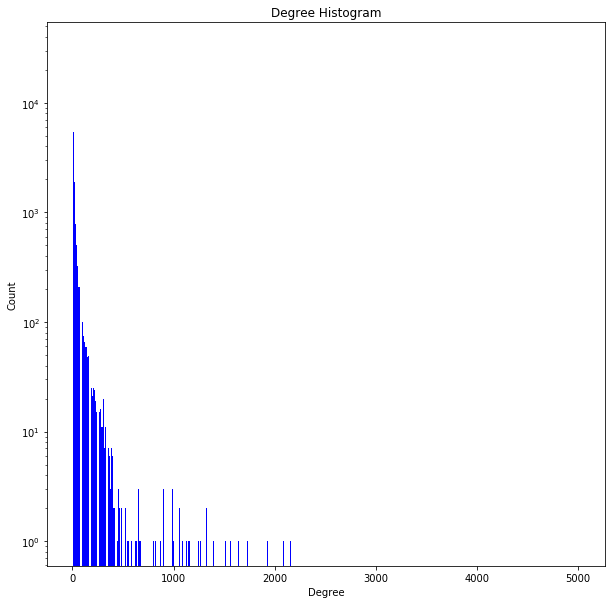

In [102]:
deg, cnt = zip(*degreeCount.items())
fig = plt.figure(figsize =(10,10))
plt.bar(deg, cnt, width=0.80, color='b', log =True)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)
plt.show()

In [98]:
a = 1.9
# kwargs = {"a": a}
args =[a]
stats.kstest(deg, 'powerlaw', args=args)
# stats.kstest(deg, 'powerlaw', **kwargs)
# https://www.digitalocean.com/community/tutorials/how-to-use-args-and-kwargs-in-python-3

KstestResult(statistic=1.0, pvalue=0.0)

In [99]:
from networkx.utils import powerlaw_sequence
pl_sequence = powerlaw_sequence(1000,exponent=2.5)

fitted_pl = stats.powerlaw.fit(deg)
# pl_sequence -> (0.15683325844803264, 1.0002786443332128, 305.631936804142)
# deg         -> (0.49419414715684246, 0.9999999999999999, 5013.2732850218745)

fitted_pl


(0.49419414715684246, 0.9999999999999999, 5013.2732850218745)

In [100]:
from pprint import pprint
pprint ([(i, stats.ks_2samp(deg, deg[:i])[1]) for i in range(200,len(deg),200)])

[(200, 1.5533859833992983e-85),
 (400, 2.886579864025407e-15),
 (600, 2.220446049250313e-16),
 (800, 0.0004667389081947082)]


In [86]:
np.random.seed(seed=123)
x = np.random.uniform(low=0, high=1, size=(10000, 1))
stats.kstest(x.ravel(), 'uniform')

KstestResult(statistic=0.008002577626569918, pvalue=0.5437230826096209)

In [93]:
from scipy import log
import numpy.random

alpha = 3
n = 5000
x = numpy.random.zipf(alpha, n)

In [97]:
alpha_hat = 1 + n / sum(log(deg))
alpha_hat

1.934824985084516

In [96]:
from scipy import log
from scipy.special import zeta
from scipy.optimize import bisect 
#https://www.johndcook.com/blog/2015/11/24/estimating-the-exponent-of-discrete-power-law-data/

xmin = 1

def log_zeta(x):
    return log(zeta(x, 1))

def log_deriv_zeta(x):
    h = 1e-5
    return (log_zeta(x+h) - log_zeta(x-h))/(2*h)

t = -sum( log(x/xmin) )/n
def objective(x):
    return log_deriv_zeta(x) - t

a, b = 1.01, 10
alpha_hat = bisect(objective, a, b, xtol=1e-6)
print(alpha_hat)

2.9557304245233538
